# LIME for ECG Time Series Dataset Example

This notebook demonstrates how to use LIME technique for time series datasets by employing the modules in src.

In [1]:
import sys
# Update the path below according to your project structure
sys.path.append('../src')

In [2]:
#Import Required Libraries
import pandas as pd
import numpy as np

### Loading and Preprocessing the Dataset

In [3]:
from data_preprocess import preprocess_data, split_data
from visualization import plot_class_distribution, plot_sample_signals


/Users/mahdihabibi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# Path to the dataset 
file_path_train = '../data/ecg_train.csv'
file_path_test = '../data/ecg_test.csv'

# Loading and preprocessing the training dataset
ecg_train = preprocess_data(file_path_train, sep=',', header=None, split=False)
print("Training dataset after preprocessing:")
print(ecg_train.head())

# Loading and preprocessing the testing dataset
ecg_test = preprocess_data(file_path_test, sep=',', header=None, split=False)
print("Testing dataset after preprocessing:")
print(ecg_test.head())


Removed 1 rows with null or infinite values.
Training dataset after preprocessing:
   0        1        2        3        4        5        6        7     \
0   3.0  0.39475  0.42683  0.40271  0.36694  0.40403  0.42741  0.42354   
1   2.0 -0.25097 -0.24359 -0.17080 -0.16245 -0.17461 -0.17786 -0.17280   
2   4.0  0.76671  0.77335  0.76703  0.76831  0.77436  0.77349  0.77428   
3   3.0 -0.11454 -0.12602 -0.15173 -0.18220 -0.18592 -0.18366 -0.18393   
4   3.0 -0.29191 -0.30657 -0.31069 -0.30988 -0.31269 -0.32061 -0.32349   

      8        9     ...     1630      1631      1632     1633      1634  \
0  0.45237  0.42515  ...  0.42560  0.423450  0.439390  0.45879  0.452610   
1 -0.17083 -0.17054  ... -0.23849 -0.241870 -0.244640 -0.24521 -0.243480   
2  0.77122  0.76613  ...  0.75079  0.753830  0.759440  0.76402  0.769820   
3 -0.16847 -0.15904  ... -0.02097 -0.023981 -0.037699 -0.05316 -0.049396   
4 -0.31899 -0.33060  ... -0.23937 -0.254440 -0.262070 -0.26039 -0.258970   

       1635    

In [5]:
# Check info for train dataset
ecg_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Columns: 1640 entries, 0 to 1639
dtypes: float64(1640)
memory usage: 2.3 MB


In [6]:
# Check info for test dataset
ecg_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 1640 entries, 0 to 1639
dtypes: float64(1640)
memory usage: 512.6 KB


In [7]:
# Split train dataset into one column as targets/classes and rest as features
ecg_train_x, ecg_train_y = split_data(ecg_train, target_column=0, split=True)

print("Training features:")
print(ecg_train_x.head(2))

print("Training targets:")
print(ecg_train_y.head(2))

Training features:
      1        2        3        4        5        6        7        8     \
0  0.39475  0.42683  0.40271  0.36694  0.40403  0.42741  0.42354  0.45237   
1 -0.25097 -0.24359 -0.17080 -0.16245 -0.17461 -0.17786 -0.17280 -0.17083   

      9        10    ...     1630     1631     1632     1633     1634  \
0  0.42515  0.62191  ...  0.42560  0.42345  0.43939  0.45879  0.45261   
1 -0.17054 -0.17127  ... -0.23849 -0.24187 -0.24464 -0.24521 -0.24348   

      1635     1636     1637     1638     1639  
0  0.41991  0.37533  0.36650  0.39192  0.39037  
1 -0.24364 -0.24738 -0.24961 -0.24905 -0.25044  

[2 rows x 1639 columns]
Training targets:
0    3.0
1    2.0
Name: 0, dtype: float64


In [8]:
# Check for Class Imbalance
print(ecg_train_y.value_counts(normalize=True))

0
4.0    0.278075
2.0    0.245989
1.0    0.240642
3.0    0.235294
Name: proportion, dtype: float64


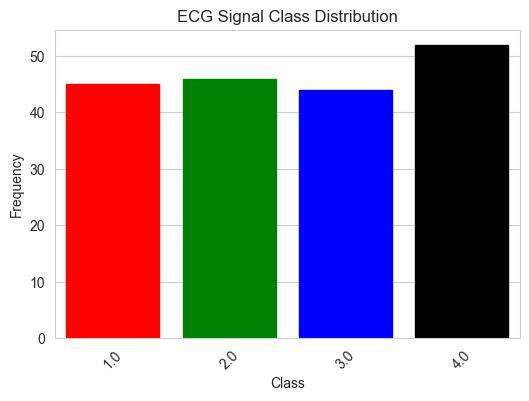

In [9]:
# Plots the distribution of classes using a bar chart
plot_class_distribution(ecg_train_y, title="ECG Signal Class Distribution")


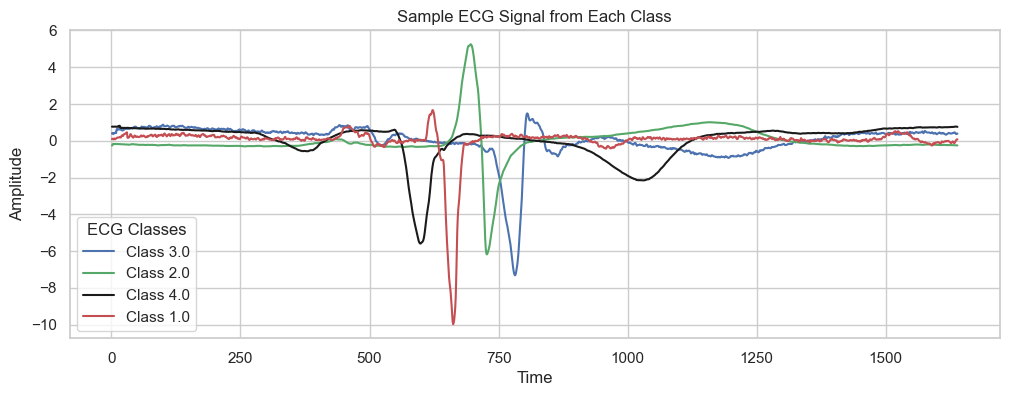

In [10]:
# Plots one sample signal from each class in the dataset
plot_sample_signals(ecg_train_x, ecg_train_y)


In [11]:
# Split test dataset into one column as targets/classes and rest as features
ecg_test_x, ecg_test_y = split_data(ecg_test, target_column=0, split=True)

print("Testing features:")
print(ecg_test_x.head(2))

print("Testing targets:")
print(ecg_test_y.head(2))

Testing features:
      1        2        3        4        5        6        7        8     \
0 -1.10090 -1.13630 -0.26970 -0.28739 -0.25201 -0.21664 -0.18127 -0.16359   
1  0.27796  0.29375  0.32301  0.31274  0.26658  0.23322  0.24351  0.25634   

       9        10    ...     1630     1631     1632    1633     1634  \
0 -0.092842 -0.11053  ... -0.23433 -0.25201 -0.30507 -0.3935 -0.49962   
1  0.225550  0.21010  ...  0.25093  0.27654  0.28621  0.2673  0.24510   

      1635     1636     1637     1638     1639  
0 -0.58804 -0.65879 -0.74722 -0.87102 -1.03020  
1  0.22467  0.20062  0.20880  0.25725  0.28418  

[2 rows x 1639 columns]
Testing targets:
0    1.0
1    3.0
Name: 0, dtype: float64


In [12]:
# Check the shape of arrays
print("Shape of ecg_train:", ecg_train.shape)
print("Shape of ecg_train_x (features):", ecg_train_x.shape)
print("Shape of ecg_train_y (labels):", ecg_train_y.shape)

print("Shape of ecg_test:", ecg_test.shape)
print("Shape of ecg_test_x (features):", ecg_test_x.shape)
print("Shape of ecg_test_y (labels):", ecg_test_y.shape)

Shape of ecg_train: (187, 1640)
Shape of ecg_train_x (features): (187, 1639)
Shape of ecg_train_y (labels): (187,)
Shape of ecg_test: (40, 1640)
Shape of ecg_test_x (features): (40, 1639)
Shape of ecg_test_y (labels): (40,)


### Building a CNN Model 

In [13]:
from data_preprocess import prepare_for_conv1d_training

# Prepares the dataset for Conv1D training:reshapes features and one-hot encodes labels.
X_train, y_train = prepare_for_conv1d_training(ecg_train_x, ecg_train_y, num_classes=4)
X_test, y_test = prepare_for_conv1d_training(ecg_test_x, ecg_test_y, num_classes=4)

In [14]:
# Check the shape of arrays after preparation for Conv1D
print("Shape of X_train (features):", X_train.shape)
print("Shape of y_train (labels):", y_train.shape)

print("Shape of X_test (features):", X_test.shape)
print("Shape of y_test (labels):", y_test.shape)

Shape of X_train (features): (187, 1639, 1)
Shape of y_train (labels): (187, 4)
Shape of X_test (features): (40, 1639, 1)
Shape of y_test (labels): (40, 4)


In [15]:
# Build the Model
from model_training import create_cnn_model

input_shape = (X_train.shape[1], 1)
num_classes = y_train.shape[1]
model = create_cnn_model(input_shape, num_classes)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1637, 64)          256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 818, 64)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 818, 64)           0         
                                                                 
 flatten (Flatten)           (None, 52352)             0         
                                                                 
 dense (Dense)               (None, 100)               5235300   
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                        

In [16]:
# Train the CNN model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
6/6 [==============================] - 0s 32ms/step - loss: 1.0000 - accuracy: 0.6548 - val_loss: 0.2113 - val_accuracy: 0.8947
Epoch 2/10
6/6 [==============================] - 0s 13ms/step - loss: 0.0772 - accuracy: 0.9702 - val_loss: 0.0710 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 0s 13ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0330 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 13ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1158 - val_accuracy: 0.9474
Epoch 5/10
6/6 [==============================] - 0s 13ms/step - loss: 3.7533e-04 - accuracy: 1.0000 - val_loss: 0.1975 - val_accuracy: 0.9474
Epoch 6/10
6/6 [==============================] - 0s 13ms/step - loss: 3.4215e-04 - accuracy: 1.0000 - val_loss: 0.2429 - val_accuracy: 0.8947
Epoch 7/10
6/6 [==============================] - 0s 13ms/step - loss: 1.6473e-04 - accuracy: 1.0000 - val_loss: 0.2606 - val_accuracy: 0.8947
Epoch 8/10
6/6 

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy:', accuracy)

Test Accuracy: 0.949999988079071


In [18]:
# save the trained model
model.save('/Volumes/D/GitHub-Portfolio/LIME-for-Time-Series/models/my_ecg_model')


INFO:tensorflow:Assets written to: /Volumes/D/GitHub-Portfolio/LIME-for-Time-Series/models/my_ecg_model/assets


INFO:tensorflow:Assets written to: /Volumes/D/GitHub-Portfolio/LIME-for-Time-Series/models/my_ecg_model/assets


In [19]:
# Create the probability vector for each instances in test dataset
probability_vectors = model.predict(X_test)
print("Shape of probability_vector (number of rows in test dataset, number of classes):", probability_vectors.shape)
print("Predicted Classes:", probability_vectors)

2/2 [==============================] - 0s 2ms/step
Shape of probability_vector (number of rows in test dataset, number of classes): (40, 4)
Predicted Classes: [[9.60822523e-01 6.12199510e-05 2.42851593e-06 3.91139463e-02]
 [2.52706966e-09 3.01634600e-07 9.99942780e-01 5.68527867e-05]
 [1.91989326e-04 3.92525834e-07 2.44749092e-08 9.99807656e-01]
 [7.13336021e-08 1.77099213e-09 9.99999881e-01 1.72920949e-08]
 [1.00496669e-08 4.49996378e-08 9.99995470e-01 4.54836027e-06]
 [1.45962664e-09 4.84392415e-10 1.00000000e+00 1.05418507e-09]
 [1.65135336e-10 1.00000000e+00 6.45926734e-09 6.98477276e-09]
 [9.23755169e-01 2.25992167e-07 9.64754143e-09 7.62445852e-02]
 [4.78263047e-08 7.84193510e-09 2.86911721e-08 1.00000000e+00]
 [1.85972418e-11 1.00000000e+00 1.76686671e-12 3.34028860e-10]
 [1.28480046e-10 2.81508622e-10 1.00000000e+00 8.64587402e-10]
 [3.43647992e-11 4.64087879e-09 1.00000000e+00 6.33716146e-09]
 [6.93971214e-10 1.00000000e+00 1.19663246e-09 5.54597535e-10]
 [2.56602326e-11 8.056

### LIME for Time Seris Domain

#### Step 1) Select an instance for explanation and predict its class

In [20]:
id_ecg = 15                          # Just for an example: choose an index from rows
instance_ecg = X_test[id_ecg, :]     # Extract the selected instance from the test dataset
print("Shape of instance_ecg:", instance_ecg.shape)  # Check the shape of the selected instance

Shape of instance_ecg: (1639, 1)


In [21]:
# Predict the class of the selected signal by trained model
probability_vector = model.predict(instance_ecg[np.newaxis, :])
print("Probability vector of the selected instance:", probability_vector)

1/1 [==============================] - 0s 11ms/step
Probability vector of the selected instance: [[2.6865847e-12 5.9204558e-07 9.9999940e-01 5.6057192e-10]]


In [22]:
# class labels
class_labels = [0, 1, 2, 3]

# Import and call the analyze_prediction function
from lime_explanation import analyze_prediction

top_pred_classes, predicted_class = analyze_prediction(probability_vector, class_labels)

print("Top predicted classes:", top_pred_classes)
print("Predicted Class for the selected instance:", predicted_class)


Top predicted classes: [2 1 3 0]
Predicted Class for the selected instance: 2


### Step 2: Generating Perturbations in the selected ECG Signal

In [23]:
from lime_explanation import segment_ecg_signal, generate_random_perturbations
from visualization import plot_segmented_ecg

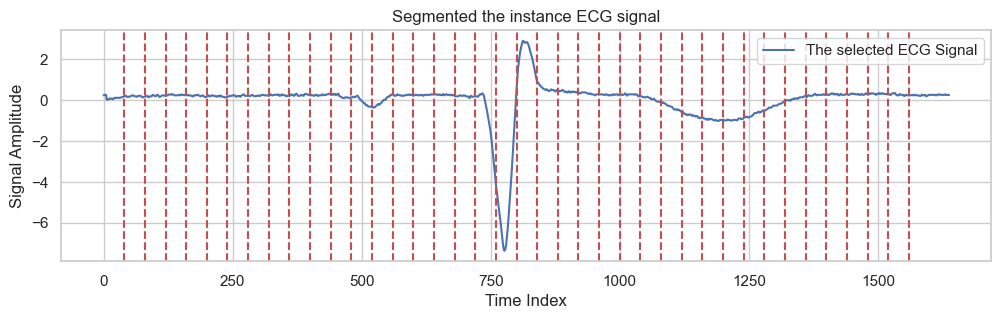

In [24]:
# Segmentation using the fixed number of slices
num_slices = 40 
slice_width = segment_ecg_signal(instance_ecg, num_slices)

# plot the segmented ECG signal
plot_segmented_ecg(instance_ecg, slice_width)


In [25]:
# Perturbation
num_perturbations = 150
random_perturbations = generate_random_perturbations(num_perturbations, num_slices)

# Example output
print("The shape of random_perturbations array (num_perturbations, num_slices):", random_perturbations.shape)
print("Example Perturbation:", random_perturbations[-1])


The shape of random_perturbations array (num_perturbations, num_slices): (150, 40)
Example Perturbation: [0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0
 0 1 1]


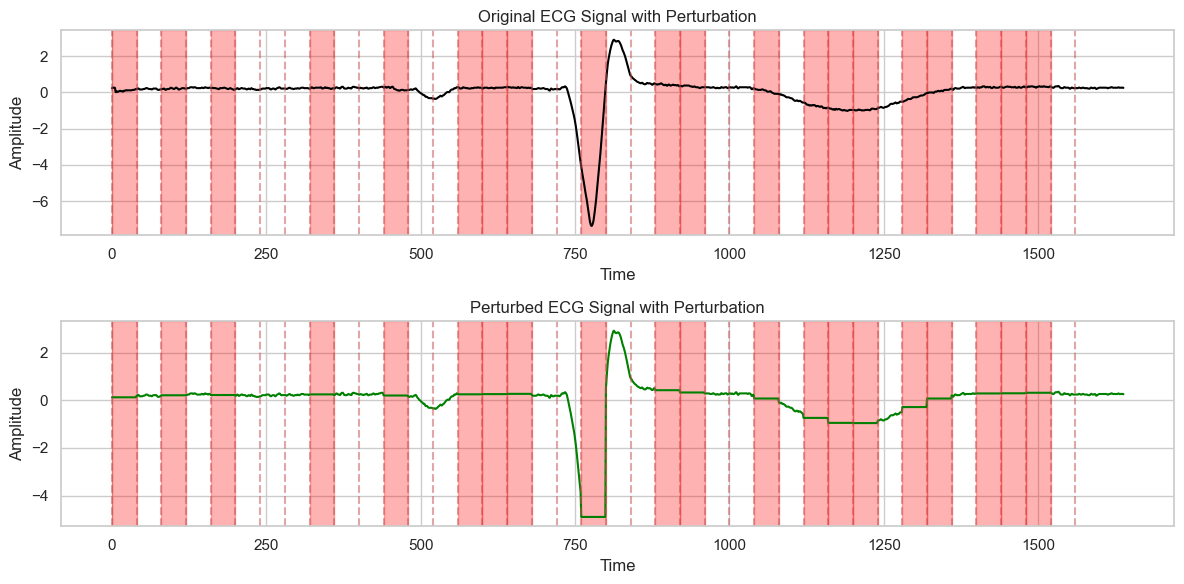

In [26]:
# Apply the Perturbation to the ECG signal and Display
from lime_explanation import apply_perturbation_to_ecg, perturb_mean
from visualization import plot_perturbed_ecg

# Choose the perturbation function
perturb_function = perturb_mean  

# Apply a random perturbation to the ECG signal
perturbed_ecg_example = apply_perturbation_to_ecg(instance_ecg, random_perturbations[-1], num_slices, perturb_function)

# plot the original and perturbed ECG signals with highlighted slices and deactivated segments
plot_perturbed_ecg(instance_ecg, perturbed_ecg_example, random_perturbations[-1], num_slices, title='ECG Signal with Perturbation')


### Step 3: Predicting Outcomes for Perturbed ECG Signals with the ECG Classifier

In [27]:
from lime_explanation import predict_perturbations

## Predict the class probabilities using the trained ECG classifier
perturbation_predictions = predict_perturbations(model, instance_ecg, random_perturbations, num_slices, perturb_mean)


1/1 [==============================] - 0s 8ms/step


### Step 4: Calculating Distances and Assigning Weights to Perturbations for ECG Signals

In [28]:
from lime_explanation import calculate_cosine_distances

# Calculate cosine distances between each perturbation and the original ECG signal representation
cosine_distances = calculate_cosine_distances(random_perturbations, num_slices)
print("Shape of Cosine Distances Array:", cosine_distances.shape)


Shape of Cosine Distances Array: (150,)


In [29]:
from lime_explanation import calculate_weights_from_distances

#Applying a Kernel Function to Compute Weights
kernel_width = 0.25  # This can be adjusted based on your specific needs
weights = calculate_weights_from_distances(cosine_distances, kernel_width)

# Now we have the weights for each perturbation for further analysis
print("Shape of Weights Array:", weights.shape)


Shape of Weights Array: (150,)


In [30]:
# Check the shape of perturbation predictions
print("Shape of perturbation_predictions:", perturbation_predictions.shape)

Shape of perturbation_predictions: (150, 1, 4)


### Step 5: Constructing an Interpretable Linear Model for ECG Analysis

In [31]:
from lime_explanation import fit_explainable_model

# Constructing the Explainable Model for ECG Signals
segment_importance_coefficients = fit_explainable_model(perturbation_predictions, random_perturbations, weights, target_class=top_pred_classes[0])

# The importance coefficients for each segment
print("Segment Importance Coefficients:", segment_importance_coefficients)


Segment Importance Coefficients: [ 9.22297320e-09  1.26698970e-08  5.53387647e-09  6.25533323e-09
  3.76481671e-09 -7.37439494e-09  4.47139829e-09 -9.75092713e-09
  9.34897782e-09 -1.30896053e-08 -1.62798052e-08 -3.36454635e-09
  3.38380385e-09  9.61862652e-08 -5.15851413e-09  1.13056193e-08
 -8.69844710e-09 -2.70965415e-09  8.65957832e-08  1.13721921e-07
  8.01311368e-08  1.67043378e-08  1.42398119e-08 -8.02115202e-09
  2.02637425e-08  1.40631131e-08 -5.69910648e-10 -3.74319659e-08
  3.73196837e-09 -1.87477095e-10  5.36113266e-09 -5.55803849e-09
 -2.12973755e-08 -3.97073569e-09  1.00583040e-08  1.76368396e-08
  1.91694705e-08  2.01435378e-08  2.12903579e-09  4.57058127e-09]


### Step 6: Extracting Insights from the Linear Model

In [32]:
# Isolating Influential Signal Segments
from lime_explanation import identify_top_influential_segments

number_of_top_features = 5
top_influential_segments = identify_top_influential_segments(segment_importance_coefficients, number_of_top_features)

# The indices of the top influential segments
print("Top Influential Signal Segments:", top_influential_segments)


Top Influential Signal Segments: [27 20 18 13 19]


/Users/mahdihabibi/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mahdihabibi/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


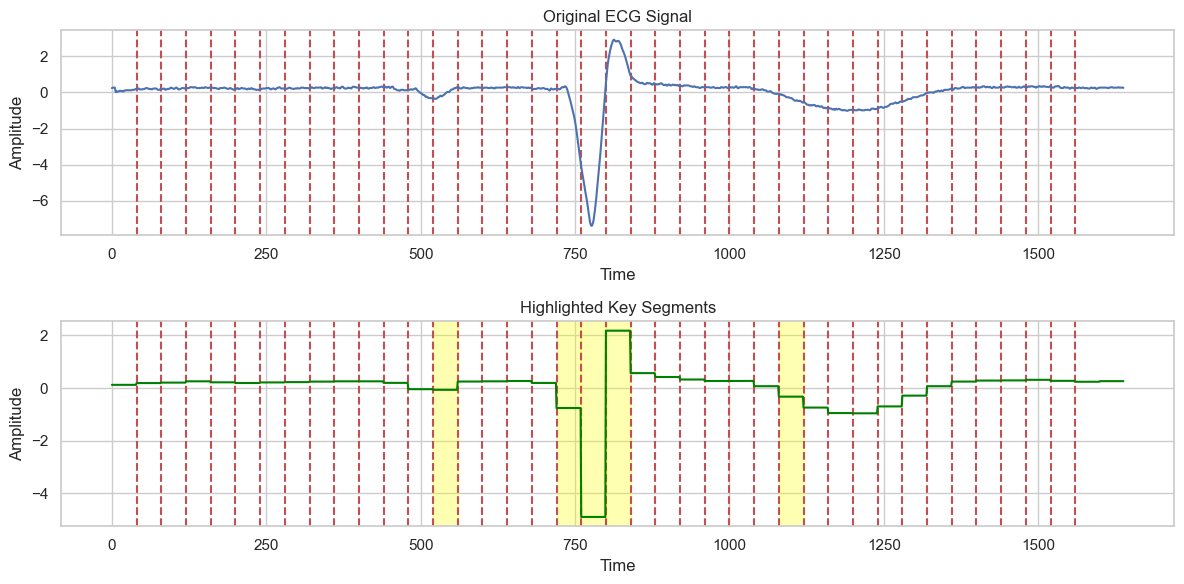

In [33]:
# Visualizing the LIME Explanation: Highlighting Key Segments
from visualization import visualize_lime_explanation

visualize_lime_explanation(instance_ecg, top_influential_segments, num_slices, perturb_function=perturb_mean)


### Conclusion

As seen from the plots above, we could identify the most influential segments of the ECG signal (yellow segments) from our analysis. These highlighted segments showcase the most important parts of the ECG signal that significantly impact the model's decision-making process. This visual representation helps to demystify the model's reasoning, highlighting specific signal segments that are critical in influencing its predictions.